<h1><center><u>Market basket analysis</u></center></h1>

<h2><u>Team Members:</u></h2><br>
1.Pasala Rajitha Lakshmi- 185002073<br>
2.Ritika CM- 185002081<br>
3.Shobia V- 185002094<br>


<h3><u>About the project..</u></h3>

We are going to perform cluster analysis for the dataset <u>'Mall_Customers.csv'</u><br><br>
we use various algorithm models on the dataset and find out which algorithm model is efficient ..<br>
<u>The various Models used are:-</u>

1.Logistic Regression<br>
2.Random Forest<br>
3.SVM<br>
4.KNN<br>
5.Ensemble Voting Classifier<br>
6.Ada Boosting<br>

<h3><u>Importing necessary Header Files:</h3>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<h3><u>About Data Set</u></h3><br>
Customer ID - Unique identification of customer<br>
Gender - Sex of the customer<br>
Age - Age of customer<br>
Annual Income - Income of salary in 1000's unit Dollars<br>
Spending Score - Readiness of customer to spend money

<h3><b><u>Data Preparation</b></h3>

In [4]:
df = pd.read_csv("Mall_Customers.csv",index_col=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


<h2><u>Cleaning the data set...</u></h2>
now we can have to clean the datset..<br>
<h3><u>Analysing Missing Values</h3>

In [8]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

By analysing we find that there are no missings values in the given data set.<br>So we can proceed to next step..<br>

<h3><u>Analysing Outliers</u></h3>

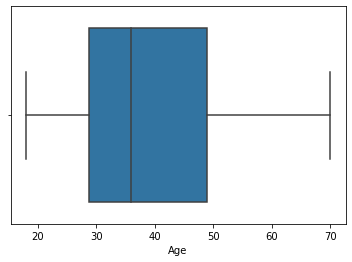

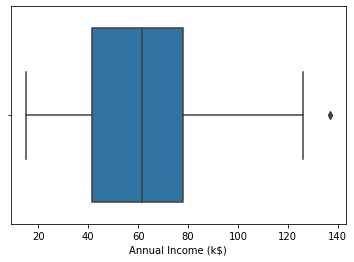

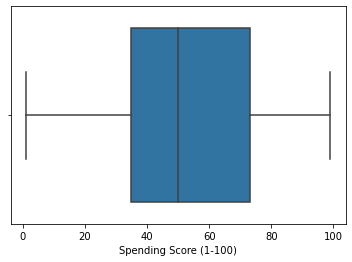

In [9]:
for x in df.select_dtypes(np.number).columns:
    sns.boxplot(x=df[x])
    plt.show()

From the above graphs,there isn't much to worry about OUTLIERS.<br>
Now we can analyse the dataset we took...<br>

<h3><u>Analysing the data set</h3>

In [10]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Except 'Gender' column , all other columns  have datatype of 'int64'<br>

<h3><u>Visualizing the clusters</h3>

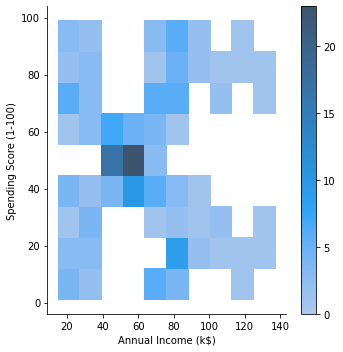

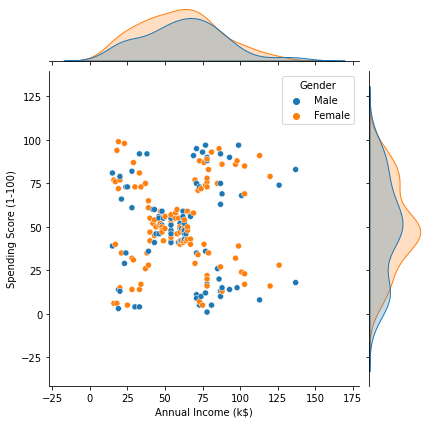

In [11]:
sns.displot(df, x="Annual Income (k$)", y="Spending Score (1-100)",cbar=True)
sns.jointplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)",hue = "Gender")

<h4>By analysing the above graphs, we can find <u>5 clusters</u>...<br><br></h4>
They are:<br>

    Cluster 1:
        Low Annual Income and Low Spending Score

    Cluster 2:
        Low Annual Income and High Spending Score

    Cluster 3:
        High Annual Income and Low Spending Score

    Cluster 4:
        High Annual Income and High Spending Score
    
    Cluster 5:
        Average Annual Income and Average Spending Score


<h3><u>Converting the datatype of 'Gender' from object to numerical type...</u></h3><br>
Converting obeject type values to dummy values
    (Male-1,Female-0)
    

In [12]:
pd.get_dummies(df['Gender'])

,Female,Male
CustomerID,,
1,0,1
2,0,1
3,1,0
4,1,0
5,1,0
...,...,...
196,1,0
197,1,0
198,0,1


In [13]:
gender = pd.get_dummies(df['Gender'],drop_first=True)

In [14]:
df.drop(['Gender'],axis=1,inplace=True)

In [15]:
df = pd.concat([df,gender],axis=1)

In [16]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
 3   Male                    200 non-null    uint8
dtypes: int64(3), uint8(1)
memory usage: 6.4 KB


The datatype of 'Gender' column became uint8 datatype<br>

<h4>The dataframe is now CLEAN!!</h4>

<h3><u>Apply feature scaling by standardizing the data.</u></h3><br>
First import StandardScaler class fromsklearn.preprocessing


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
std_scale = StandardScaler().fit(df)

In [20]:
df_scaled = std_scale.transform(df)

In [21]:
df_scaled[:5,]

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526]])

<h4>Now the dataset is split into training set and testing data set..

In [22]:
#Model Training
X = df.drop('Male' , axis = 1 )
y = df['Male']
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state =185002094)

<h2><u>1. Logistic Regression

Import LogisticRegression Class from sklearn.linear_model<br>
Then fit the training set into the model..

In [23]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
Log_classifier= LogisticRegression(random_state = 185002094)
Log_classifier.fit(X_train, y_train)

LogisticRegression(random_state=185002094)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression
Log_classifier= LogisticRegression(random_state = 185002094)
Log_classifier.fit(X_train, y_train)

LogisticRegression(random_state=185002094)

<h4>Predicting and Printing out the ACCURACY of Logististic Regression Model..

In [26]:
y_pred = Log_classifier.predict(X_test)

In [27]:
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Logistic Regression is:  0.6333333333333333


In [28]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
conf

array([[31,  6],
       [16,  7]], dtype=int64)

<h2><u>2. Random Forest

Import RandomForestClassifier Class from sklearn.ensemble<br>
Then fit the training set into the model..

In [29]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 185002094)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=185002094)

<h4>Predicting and Printing out the ACCURACY of Random Forest Model..

In [30]:
y_pred = rf.predict(X_test)

In [31]:
from sklearn import metrics
print('The accuracy of Random Forest is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Random Forest is:  0.5166666666666667


In [32]:
conf = confusion_matrix(y_test, y_pred)
conf

array([[23, 14],
       [15,  8]], dtype=int64)

<h2><u>3. Support Vector Machine (SVM)

Import SVC Class from sklearn.svm<br>
Then fit the training set into the model..

In [33]:
#SVM
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state =185002094)
svc.fit(X_train, y_train)

SVC(random_state=185002094)

<h4>Predicting and Printing out the ACCURACY of SVM Model..

In [34]:
y_pred = svc.predict(X_test)

In [35]:
from sklearn import metrics
print('The accuracy of SVM is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of SVM is:  0.6166666666666667


In [36]:
conf = confusion_matrix(y_test, y_pred)
conf

array([[29,  8],
       [15,  8]], dtype=int64)

<h2><u>4. K-Nearest Neighbours (KNN)

Import KNeighborsClassifier Class from sklearn.neighbors<br>
Then fit the training set into the model..

In [37]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

<h4>Predicting and Printing out the ACCURACY of KNN Model..

In [38]:
y_pred = knn.predict(X_test)

In [39]:
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of KNN is:  0.5833333333333334


In [40]:
print(confusion_matrix(y_test, y_pred))

[[30  7]
 [18  5]]


In [41]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

<h4>Plotting Error Rate vs K Value graph

Text(0, 0.5, 'Error Rate')

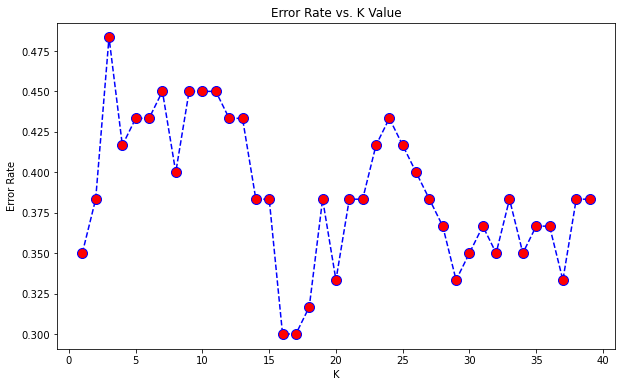

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the graph it is clear that the Error rate is minimum at K=16..

In [43]:
knn= KNeighborsClassifier(n_neighbors = 16)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

<h4>Predicting and Printing out the ACCURACY of KNN Model..

In [44]:
y_pred = knn.predict(X_test)

In [45]:
print('The accuracy of KNN  with K=16 is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of KNN  with K=16 is:  0.7


In [46]:
print(confusion_matrix(y_test, y_pred))

[[33  4]
 [14  9]]


<h2><u>5. Ensemble Voting Classifier

Import VotingClassifier Class from sklearn.ensemble<br>
Then fit the training set into the model..

In [47]:
#Esemble voting classifier
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[('lr',Log_classifier), ('rf', rf),('knn',knn),('svm',svc)], voting='hard')

In [48]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=185002094)),
                             ('rf',
                              RandomForestClassifier(random_state=185002094)),
                             ('knn', KNeighborsClassifier(n_neighbors=16)),
                             ('svm', SVC(random_state=185002094))])

<h4>Predicting and Printing out the ACCURACY of Ensemble Voting Classifier Model..

In [49]:
y_pred = ensemble.predict(X_test)

In [50]:
print('The accuracy of ensemble model ', metrics.accuracy_score(y_pred, y_test))

The accuracy of ensemble model  0.65


In [51]:
print(confusion_matrix(y_test, y_pred))

[[32  5]
 [16  7]]


<h2><u>6. ADA Boost

Import AdaBoostRegressor Class from sklearn.ensemble<br>
Then fit the training set into the model..

In [52]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [56]:
ada_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=8), n_estimators=200, learning_rate=0.01,
                              random_state=185002094)

In [57]:
ada_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=8),
                  learning_rate=0.01, n_estimators=200, random_state=185002094)

<h4>Predicting and Printing out the ACCURACY of Ensemble Voting Classifier Model..

In [58]:
pred = ada_model.predict(X_test)

In [59]:
print('The accuracy of Adaboost is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Adaboost is:  0.65


<h1>Model comparision:</h1>

<h4>The accuracy of Logistic Regression is 63.3%<br><br>
The accuracy of Random Forest is 51.7%<br><br>
The accuracy of SVM is 61.7%<br><br>
The accuracy of KNN with K=16 is 70%<br><br>
The accuracy of Ensemble Voting Classifier is 65%<br><br>
The accuracy of ADA Boost is 65%<br><br>

<h3><u>RESULT:</u> <br><br>
By comparing the above models,we can come to a conclusion that the <u>KNN model with (K=16)</u> is the most efficient model among all the other models for the given data set..

<br><br>
<h1><u>Reasoning for choosing the algorithm- K Nearest Neighbours(KNN) as BEST

<h3>We choose the KNN model because it has higher <u>ACCURACY</u> than other five models.<br>
    we choose K=16 as parameter because in <u>ERROR Rate vs K Value graph</u>, the error rate was minimum at K=16
    <br>And hence we choose it
    <br><br>The other reasons are:

1. The algorithm is simple to implement
2. It has quick calculation time
3. High accuracy – you do not need to compare with better-supervised learning models.
4. It is robust to noisy  training
5. Can easily train large data
6. Versatile – useful for regression and classification.

<h2>Implementation of KNN algorithm for given dataset..

<h4>Plotting Error Rate vs K Value graph

Text(0, 0.5, 'Error Rate')

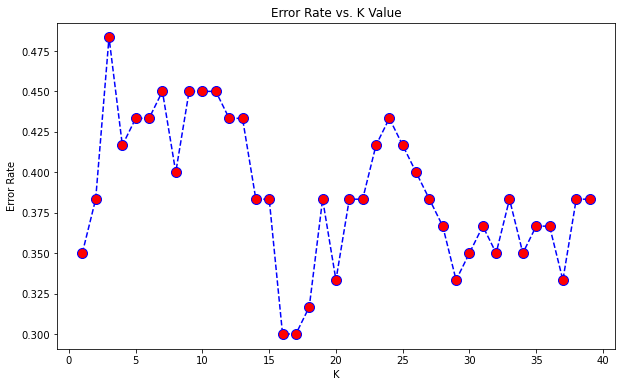

In [77]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

<u><h3>From the graph it is clear that the Error rate is minimum at K=16..

<h4>analysing with K=1

In [78]:
from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


Confusion Matrix
[[27 10]
 [11 12]]


              precision    recall  f1-score   support

           0       0.71      0.73      0.72        37
           1       0.55      0.52      0.53        23

    accuracy                           0.65        60
   macro avg       0.63      0.63      0.63        60
weighted avg       0.65      0.65      0.65        60



<h4>Analysing with k=16

In [79]:
knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=16')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=16


Confusion Matrix
[[33  4]
 [14  9]]


              precision    recall  f1-score   support

           0       0.70      0.89      0.79        37
           1       0.69      0.39      0.50        23

    accuracy                           0.70        60
   macro avg       0.70      0.64      0.64        60
weighted avg       0.70      0.70      0.68        60



<h3>We can see K=16 got more accuracy than K=1..

<h2>Thus KNN with K=16 is the best model for our dataset...